# **Part 2: Regression Tree [20 marks]**

In this part, you will use scikit-learn's decision tree regressor and test its performance on the same dataset used in the previous part. You will be using different lookback sizes to form your data this time.

### Imports

In [14]:
# import all required libraries here
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Regression Tree Implementation

* Write code to implement regression tree models for each lookback size ranging from 1-3. (Code modularity hint: use a blueprint for the model, and use its instances for each dataset formed from a lookback size)
* Evaluate the performance of each tree model by forming testing datasets associated with each respective lookback.

In [33]:
# code here
def create_lookback_dataset(data, lookback):
   
    X, Y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback)].flatten())  # Flattening the window
        Y.append(data[i + lookback])
    return np.array(X), np.array(Y)
def process_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:          # process the lines to extract x and y coordinates
        x_str, y_str = line.strip().split(',')
        x = int(x_str)
        y = int(y_str)
        data.append([x, y])     # store x and y coordinates for each time step
    data = np.array(data)
    return data
train = process_data(r'Dataset/Training/training_data.txt')
test = process_data(r'Dataset/Testing/test01.txt')
look_back = [1,2,3]
x_train = []
y_train = []
x_test = []
y_test = []
rmse_data = []

for i in look_back:
    X, Y = create_lookback_dataset(train, i)
    x_train.append(X)
    y_train.append(Y)
    X, Y = create_lookback_dataset(test, i)
    x_test.append(X)
    y_test.append(Y)

  
for i in range(3):
    model = DecisionTreeRegressor(criterion='squared_error')
    model.fit(x_train[i], y_train[i])
    y_pred = model.predict(x_test[i])
    print(y_pred.shape)
    rmse = np.sqrt(mean_squared_error(y_test[i], y_pred))
    rmse_data.append(rmse)



  




(1799, 2)
(1798, 2)
(1797, 2)


### Evaluation and Analysis

*  Plot a line graph to evaluate your model's performance (using code for RMSE from Part 1A) across the lookback size range `i.e., 1-3`. (if any). Identify and explain any trend in how the RMSE values change with varying lookback size.

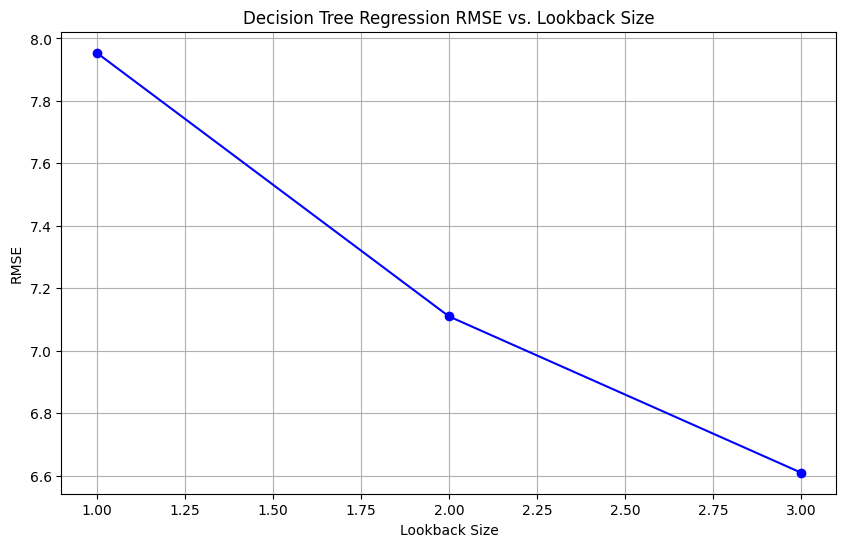

In [16]:
# code here
plt.figure(figsize=(10, 6))
plt.plot(look_back, rmse_data, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Regression RMSE vs. Lookback Size')
plt.xlabel('Lookback Size')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


### Double Click to $\color{green}{\text{add explanation/reasoning here}}$

### Visualization of Actual and Predicted Path

* Modify and use same code from the previous part. The time interval should be 6 seconds (choose from wherever in the testing data).
* Generate a graph illustrating the actual and predicted paths using one of the above lookback sizes. Which one should you choose?

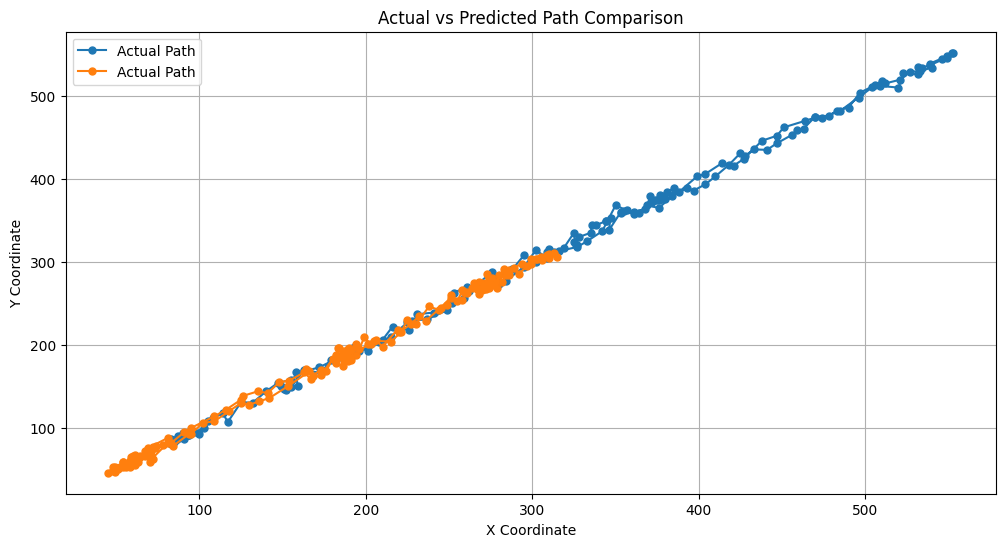

In [32]:
# code here

index = 0

start_index = 100 
end_index = start_index + 180  # ending index

X_test_interval = np.array(x_test[index][start_index:end_index])
y_test_interval = np.array(y_test[index][start_index:end_index] )
actual_path = test[start_index:end_index]
#print(len(actual_path),len(y_test_interval))

model_temp = DecisionTreeRegressor(criterion='squared_error')
model_temp.fit(x_train[index], y_train[index])
y_pred_temp = model_temp.predict(X_test_interval)





plt.figure(figsize=(12, 6))
plt.plot(actual_path,y_pred_temp, label='Actual Path', marker='o', linestyle='-', markersize=5)
plt.title('Actual vs Predicted Path Comparison')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


